## Main concept:
* Interactive with file / database
* Cleaning, munging, combining, normalizing, reshaping, slicing and dicing, andtransforming data for analysis
* Tranformation: group data sets to new dataset.
* Modeling and computation
* Create static / graphic visualization.

# 1. Iteractive with file / database: Read and write 

### Read file

In [3]:
path = 'data/data_facebook_sample.json'

In [5]:
open(path).read()

'{\n   "data": [\n      {\n         "id": "X999_Y999",\n         "from": {\n            "name": "Tom Brady", "id": "X12"\n         },\n         "message": "Looking forward to 2010!",\n         "actions": [\n            {\n               "name": "Comment",\n               "link": "http://www.facebook.com/X999/posts/Y999"\n            },\n            {\n               "name": "Like",\n               "link": "http://www.facebook.com/X999/posts/Y999"\n            }\n         ],\n         "type": "status",\n         "created_time": "2010-08-02T21:27:44+0000",\n         "updated_time": "2010-08-02T21:27:44+0000"\n      },\n      {\n         "id": "X998_Y998",\n         "from": {\n            "name": "Peyton Manning", "id": "X18"\n         },\n         "message": "Where\'s my contract?",\n         "actions": [\n            {\n               "name": "Comment",\n               "link": "http://www.facebook.com/X998/posts/Y998"\n            },\n            {\n               "name": "Like",\n     

### Convert string json to dictionary object

In [6]:
import json
path = 'data/data_facebook_sample.json'
data = open(path).read()
records = json.loads(data)

### Write data to file

In [2]:
file = open('filename', 'w')
file.write('abc')
file.close()

### Read data line by line

In [4]:
import json
path_usa = "data/usa_gov_data.txt"
records = [json.loads(line) for line in open(path_usa)]

In [5]:
records

[{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  u'al': u'en-US,en;q=0.8',
  u'c': u'US',
  u'cy': u'Danvers',
  u'g': u'A6qOVH',
  u'gr': u'MA',
  u'h': u'wfLQtf',
  u'hc': 1331822918,
  u'hh': u'1.usa.gov',
  u'l': u'orofrog',
  u'll': [42.576698, -70.954903],
  u'nk': 1,
  u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  u't': 1331923247,
  u'tz': u'America/New_York',
  u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'},
 {u'a': u'GoogleMaps/RochesterNY',
  u'c': u'US',
  u'cy': u'Provo',
  u'g': u'mwszkS',
  u'gr': u'UT',
  u'h': u'mwszkS',
  u'hc': 1308262393,
  u'hh': u'j.mp',
  u'l': u'bitly',
  u'll': [40.218102, -111.613297],
  u'nk': 0,
  u'r': u'http://www.AwareMap.com/',
  u't': 1331923249,
  u'tz': u'America/Denver',
  u'u': u'http://www.monroecounty.gov/etc/911/rss.php'},
 {u'a': u'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NE

# 2. Interact with data: counting, cleaning, munging, combining, normalizing, reshaping, slicing and dicing, and transforming data for analysis

## Counting data
URL shortening service bit.ly partnered with the United States governmentwebsite usa.gov to provide a feed of anonymous data gathered from users who shortenlinks ending with .gov or .mil

In that data, each record contain infomation about timezone of user who shortenlinks. 

#### Pure python
In python, *list comprehension* is the way to apply an operation like **json.loads** to a collection of strings or other object 

In [14]:
records = [json.loads(line) for line in open(path_usa)]
timezones = [rec['tz'] for rec in records if 'tz' in rec]

In [18]:
timezones

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'',
 u'America/Los_Angeles',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Asia/Hong_Kong',
 u'Asia/Hong_Kong',
 u'America/New_York',
 u'America/Denver',
 u'Europe/Rome',
 u'Africa/Ceuta',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Madrid',
 u'Asia/Kuala_Lumpur',
 u'Asia/Nicosia',
 u'America/Sao_Paulo',
 u'',
 u'',
 u'Europe/London',
 u'America/New_York',
 u'Pacific/Honolulu',
 u'America/Chicago',
 u'',
 u'',
 u'Pacific/Honolulu',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'America/New_York',
 u'America/Chicago',
 u'Europe/Rome',
 u'America/New_York',
 u'America/New_York',
 u'America/Los_Angeles',
 u'',
 u'',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Malta',
 u'America/New_York',
 u'America/New_York',
 u'',
 u'America/Los_Angeles',
 u'America/Sao_Pa

In [15]:
def get_counts(sequence):
  counts = {}
  for x in sequence:
    if (x in counts):
      counts[x] = counts[x] + 1
    else:
      counts[x] = 1
  return counts
counts = get_counts(timezones)

In [19]:
counts

{u'': 521,
 u'Africa/Cairo': 3,
 u'Africa/Casablanca': 1,
 u'Africa/Ceuta': 2,
 u'Africa/Johannesburg': 1,
 u'Africa/Lusaka': 1,
 u'America/Anchorage': 5,
 u'America/Argentina/Buenos_Aires': 1,
 u'America/Argentina/Cordoba': 1,
 u'America/Argentina/Mendoza': 1,
 u'America/Bogota': 3,
 u'America/Caracas': 1,
 u'America/Chicago': 400,
 u'America/Chihuahua': 2,
 u'America/Costa_Rica': 1,
 u'America/Denver': 191,
 u'America/Edmonton': 6,
 u'America/Guayaquil': 2,
 u'America/Halifax': 4,
 u'America/Indianapolis': 20,
 u'America/La_Paz': 1,
 u'America/Lima': 1,
 u'America/Los_Angeles': 382,
 u'America/Managua': 3,
 u'America/Mazatlan': 1,
 u'America/Mexico_City': 15,
 u'America/Monterrey': 1,
 u'America/Montevideo': 1,
 u'America/Montreal': 9,
 u'America/New_York': 1251,
 u'America/Phoenix': 20,
 u'America/Puerto_Rico': 10,
 u'America/Rainy_River': 25,
 u'America/Recife': 2,
 u'America/Santo_Domingo': 1,
 u'America/Sao_Paulo': 33,
 u'America/St_Kitts': 1,
 u'America/Tegucigalpa': 1,
 u'Ameri

#### Using standard python lib
Python provides us several libs to init the value of dictionary.

In [20]:
from collections import  defaultdict
def get_counts2(sequence):
  counts = defaultdict(int)
  for x in timezones:
    counts[x] = counts[x] + 1
  return counts

counts = get_counts(timezones)

In [21]:
counts

{u'': 521,
 u'Africa/Cairo': 3,
 u'Africa/Casablanca': 1,
 u'Africa/Ceuta': 2,
 u'Africa/Johannesburg': 1,
 u'Africa/Lusaka': 1,
 u'America/Anchorage': 5,
 u'America/Argentina/Buenos_Aires': 1,
 u'America/Argentina/Cordoba': 1,
 u'America/Argentina/Mendoza': 1,
 u'America/Bogota': 3,
 u'America/Caracas': 1,
 u'America/Chicago': 400,
 u'America/Chihuahua': 2,
 u'America/Costa_Rica': 1,
 u'America/Denver': 191,
 u'America/Edmonton': 6,
 u'America/Guayaquil': 2,
 u'America/Halifax': 4,
 u'America/Indianapolis': 20,
 u'America/La_Paz': 1,
 u'America/Lima': 1,
 u'America/Los_Angeles': 382,
 u'America/Managua': 3,
 u'America/Mazatlan': 1,
 u'America/Mexico_City': 15,
 u'America/Monterrey': 1,
 u'America/Montevideo': 1,
 u'America/Montreal': 9,
 u'America/New_York': 1251,
 u'America/Phoenix': 20,
 u'America/Puerto_Rico': 10,
 u'America/Rainy_River': 25,
 u'America/Recife': 2,
 u'America/Santo_Domingo': 1,
 u'America/Sao_Paulo': 33,
 u'America/St_Kitts': 1,
 u'America/Tegucigalpa': 1,
 u'Ameri

#### Using pandas
The main pandas data structure is the DataFrame, which you can think of as representing a table or spreadsheet of data.

In [23]:
from pandas import DataFrame, Series

In [24]:
import pandas as pd

In [26]:
frame = DataFrame(records)

In [27]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [31]:
frame['tz'][-10:]

3550       America/New_York
3551                       
3552        America/Chicago
3553       America/New_York
3554       America/New_York
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, dtype: object

**Pandas provide a function to count value. Such as:**

In [34]:
tz_counts = frame['tz'].value_counts()

In [35]:
tz_counts

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Helsinki                     10
Asia/Hong_Kong                      10
America/Puerto_Rico      

## Cleaning and munging
In a dataset, there are some records are missed or unknown. Pandas can clean and mung them.
* using **fillna(<value>)** to fill missing value by other value

In [42]:
clean_tz = frame['tz'].fillna('Missing')

* replacing empty string. 

In [43]:
clean_tz[clean_tz == ''] = 'Unknown'

In [44]:
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                   Unknown
8                   Unknown
9                   Unknown
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                  Unknown
29                  Unknown
               ...         
3530    America/Los_Angeles
3531                Unknown
3532       America/New_York
3533       America/New_York
3534        America/

In [45]:
tz_counts = clean_tz.value_counts()

In [46]:
tz_counts

America/New_York                  1251
Unknown                            521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Asia/Hong_Kong                      10
Europe/Prague                       10
Europe/Helsinki          

** Then we can using matplotlib to visualize timezone in a chart**

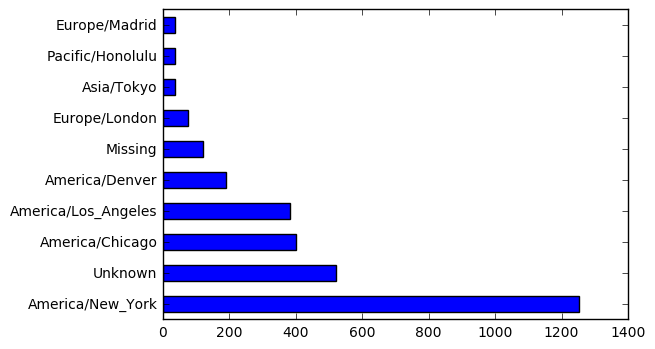

In [63]:
import matplotlib.pyplot as plt
tz_counts[:10].plot(kind='barh', rot=0)
plt.show()

## Combining data

In the data sample contain another information about the Browser and Operation System of user. They are shown in 'a'.

In [64]:
frame['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

We want to get information about Browser and OS only. Then, we have to **split** each string, and get necessary info.

In [67]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [69]:
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

We care about operating system is Windows or not. This code belows is to get records which does not have Null value in 'a'

In [70]:
cframe = frame[frame.a.notnull()]

In [72]:
cframe[:10]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


Then, compute each row is Window or not

In [78]:
import numpy as np
os = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [79]:
os[:10]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows',
       'Windows', 'Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

** Merge is one of the common combining content.**

In [88]:
by_tz_os = cframe.groupby(['tz', os])
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

Each row in DataFrame by_tz_os is showing in stack. To unstack using **unstack()**

In [89]:
agg_counts = by_tz_os.size().unstack()

In [90]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,NaN,3.0
Africa/Casablanca,NaN,1.0
Africa/Ceuta,NaN,2.0
Africa/Johannesburg,NaN,1.0
Africa/Lusaka,NaN,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,NaN
America/Argentina/Cordoba,NaN,1.0


Then fill NaN value by 0. Using **fillna(0)**

In [91]:
agg_counts.fillna(0)

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


*** I don't understand this code below ***

In [95]:
indexer = agg_counts.sum(1).argsort()
indexer

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
America/Bogota                    62
America/Caracas                   34
America/Chicago                   60
America/Chihuahua                 36
America/Costa_Rica                37
America/Denver                    27
America/Edmonton                  76
America/Guayaquil                 56
America/Halifax                   89
America/Indianapolis               2
America/La_Paz                     4
America/Lima                       5
America/Los_Angeles                7
America/Managua                    8
America/Mazatlan                   9
America/Mexico_City               86
America/Monterrey                 1

Then show the result to **barh** in stack option

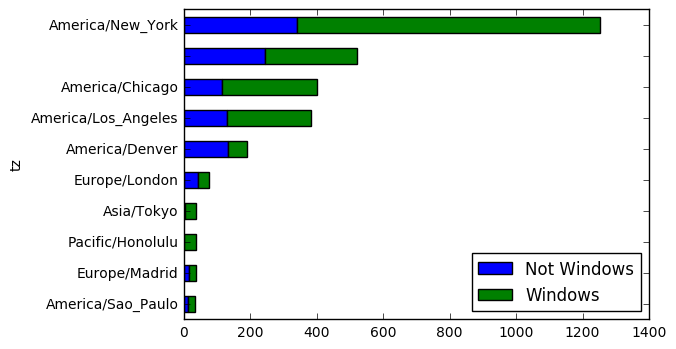

In [99]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset.plot(kind='barh', stacked='True', rot=0)
plt.show()

## Slicing and dicing
The MovieLens 1M data set contains 1 million ratings collected from 6000 users on4000 movies. It’s spread across 3 tables: ratings, user information, and movie infor-mation.
* users.dat

In [2]:
import pandas as pd
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/ml-1m/users.dat', sep='::', header=None, names=unames)
users

/home/khanhlq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


* ratings.dat

In [3]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/ml-1m/ratings.dat', sep='::', header=None, names=rnames)
ratings

/home/khanhlq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


* movies.dat

In [4]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/ml-1m/movies.dat', sep='::', header=None, names=mnames)
movies

/home/khanhlq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


## Merging
 Analyzing the data spread across three tables is not a simple task, but it will be easier if they are merged in one table. 
 
 Using **pd.merge(table_a, table_b)**. **merge** function will join 2 DataFrame and remove the same column 

In [6]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [7]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [12]:
mean_ratings = data.pivot_table('rating', rows = 'title', cols = 'gender', aggfuc = 'mean')
mean_ratings[:5]

TypeError: pivot_table() got an unexpected keyword argument 'rows'